In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
rcParams['font.size']=18

In [4]:
import sys
sys.path.append('/home/gjones/')

In [5]:
rawpath = '/data/ebex/ld2012/flight/raw/acs_v0-0/'

In [6]:
import leap
from leap.lib.xsc import loading,leveling

/home/gjones/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [7]:
import pandas as pd

In [8]:
files = pd.DataFrame.from_csv('/home/gjones/from_yama/spectra_files.csv')

In [9]:
df = np.load('/artemis/gjones/dataframe.npz')

In [10]:
df2 = df['df']


In [11]:
df = pd.DataFrame.from_records(df2)

In [21]:
df.columns

Index([u'index', u'avg', u'avg0', u'filename', u'is_at_float', u'psds', u'rms',
       u'rms0', u'timestamp', u'which', u'wpsds', u'p3', u'p3min', u'p3max',
       u'p2', u'p2min', u'p2max', u'p1', u'p0', u'wp3', u'wp3min', u'wp3max',
       u'wp2', u'wp2min', u'wp2max', u'wp1', u'wp0'],
      dtype='object')

In [12]:
wavk = np.arange(513)/(3.4)

## Computing power spectra and statistics

  * Divide image into six strips
  * Window along y axis and compute magnitude of 1-D FFTs
  * Average all FFTs in a strip (along the x axis)
  
  * Extract power at one cycle per 1000 m, 100 m and 10 m scales
  * Compute a quick and dirty spectral index based on the slope between 1000 m and 100 m scales

(0, 1536)

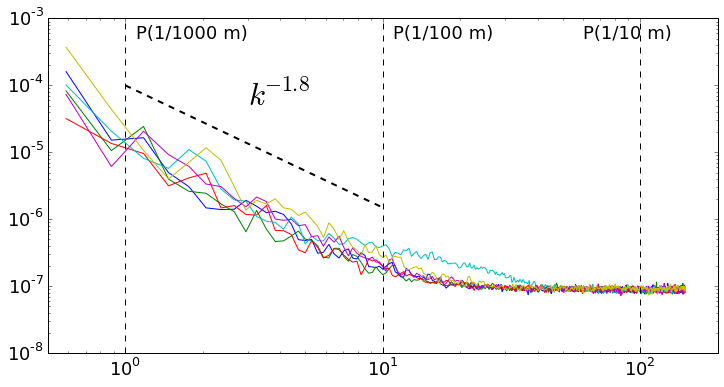

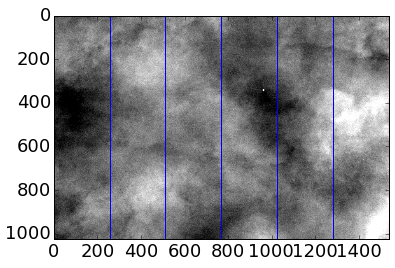

In [296]:
for k, row in df[df.index==40698].iterrows():
    pass
figure()
d = loading.get_image_array_from_filename(rawpath,row.which,row.filename,apply_flat_field_correction=True)
d = leveling.level(d)
imshow(d,cmap=cm.gray)
ax = gca()
for k in np.linspace(0,1536,7):
    ax.axvline(k)
ax.set_xlim(0,1536)

figure(figsize=(12,6))
for m in range(6):
    loglog(wavk[2:-2],row.wpsds[2:-2,m])
xlim(.5,200)
ax = gca()
ax.axvline(1.0,color='k',linestyle='--')
ax.text(1.1,5e-4,"P(1/1000 m)")
ax.axvline(10.0,color='k',linestyle='--')
ax.text(11,5e-4,"P(1/100 m)")
ax.axvline(100.0,color='k',linestyle='--')
ax.text(60,5e-4,"P(1/10 m)")
x = np.logspace(0,1,100)
loglog(x,10e-5*x**(-row.spidx32),lw=2,linestyle='--')
ax.text(3,5e-5,('$k^{-%.1f}$' % row.spidx32),size='xx-large')



In [211]:
df['spidx32'] = np.log10((df.wp3-df.wp1)/(df.wp2-df.wp1))

In [23]:
df.shape

(41646, 27)

##  Making cuts and looking at examples

(2325, 28)


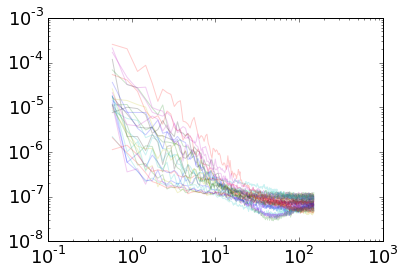

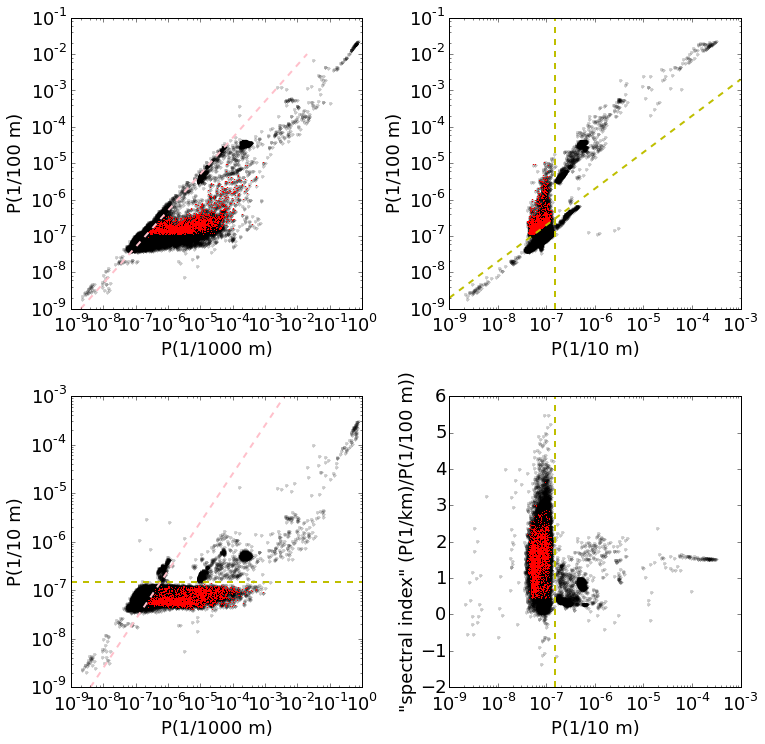

In [301]:
#dd = df[(df.wp1<2e-7)&(df.wp2>2*df.wp1)&(df.wp3>20*df.wp2)&(df.wp2max/df.wp2min<3)]
dd = df[(df.wp1<1.5e-7)&(df.wp2>2*df.wp1)&(df.wp3>2*df.wp2)&(df.wp2max/df.wp2min<3)]
#dd = df[(df.wp1>1e-4)]
print dd.shape
for k,row in dd.iterrows():
    if k % 111 == 0:
        loglog(wavk[2:-2],row.wpsds[2:-2,3],alpha=0.2)
fig,axs = subplots(2,2,figsize=(12,12))
fig.subplots_adjust(wspace=0.3,hspace=0.3)
p1 = np.logspace(-9,-3,100)
p2 = np.logspace(-9,-2,100)
axs[0,0].loglog(df.wp3,df.wp2,'k.',alpha=0.2)
axs[0,0].loglog(dd.wp3,dd.wp2,'r,')
axs[0,0].loglog(2*p2,p2,'--',color='pink',lw=2)
axs[0,0].set_xlabel('P(1/1000 m)')
axs[0,0].set_ylabel('P(1/100 m)')
axs[1,0].loglog(df.wp3,df.wp1,'k.',alpha=0.2)
axs[1,0].loglog(dd.wp3,dd.wp1,'r,')
axs[1,0].axhline(1.5e-7,color='y',linestyle='--',lw=2)
axs[1,0].loglog(4*p1,p1,'--',color='pink',lw=2)
axs[1,0].set_xlabel('P(1/1000 m)')
axs[1,0].set_ylabel('P(1/10 m)')
axs[0,1].loglog(df.wp1,df.wp2,'k.',alpha=0.2)
axs[0,1].loglog(dd.wp1,dd.wp2,'r,')
axs[0,1].loglog(p1,2*p1,'y--',lw=2)
axs[0,1].axvline(1.5e-7,color='y',linestyle='--',lw=2)
axs[0,1].set_xlabel('P(1/10 m)')
axs[0,1].set_ylabel('P(1/100 m)')
axs[1,1].semilogx(df.wp1,df.spidx32,'k.',alpha=0.2)
axs[1,1].semilogx(dd.wp1,dd.spidx32,'r,')
axs[1,1].axvline(1.5e-7,color='y',linestyle='--',lw=2)
axs[1,1].set_xlabel('P(1/10 m)')
axs[1,1].set_ylabel('"spectral index" (P(1/km)/P(1/100 m))')

for k,row in dd.iterrows():
    if k <150:
#        axs[0,0].loglog(row.wp3,row.wp2,'o')
#        axs[1,0].loglog(row.wp3,row.wp1,'o')
#        axs[0,1].loglog(row.wp1,row.wp2,'o')
        
        d = loading.get_image_array_from_filename(rawpath,row.which,row.filename,apply_flat_field_correction=True)
        d = leveling.level(d)
        fig = figure(figsize=(18,6))
        fig.suptitle(str(k))
        subplot(121)
        title(row.filename)
        imshow(d,cmap=cm.gray)
        #subplot(132)
        #loglog(wavk[1:],row.psds[1:,:])
        #loglog(wavk[1:],5*(wavk[1:]/10)**(-5./3),'--',color='gray',lw=2)
#        loglog(wavk[1:],5*(wavk[1:]/10)**(-2),color='yellow',lw=2)
#        loglog(wavk[1:],10*(wavk[1:]/10)**(-1))
        #ylim(1e-2,1e3)
        subplot(122)
        loglog(wavk[2:-2],row.wpsds[2:-2,:])
        loglog(wavk[1:],5*(wavk[1:]/10)**(-5./3),'--',color='gray',lw=2)
#        loglog(wavk[1:],5*(wavk[1:]/10)**(-2),color='yellow',lw=2)
#        loglog(wavk[1:],10*(wavk[1:]/10)**(-1))
        ylim(1e-8,1e-3)

In [299]:
dd.index[:10]

Int64Index([118, 119, 120, 121, 122, 123, 124, 125, 126, 127], dtype='int64')

In [267]:
b,h = np.histogram(df[(df.wp1<1.5e-7)&(df.wp2>2*df.wp1)&(df.wp3>2*df.wp2)&(df.wp2max/df.wp2min<3)].spidx32,bins=np.linspace(-1,5,100))

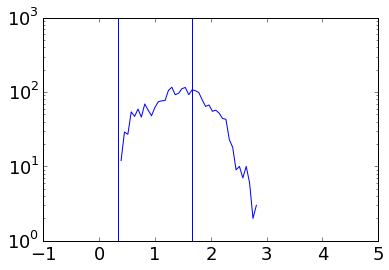

In [268]:
semilogy(h[:-1],b)
ax = gca()
ax.axvline(5/3.)
ax.axvline(1/3.)


In [304]:
dd.shape

(2325, 28)

In [305]:
import random

In [306]:
random.sample?

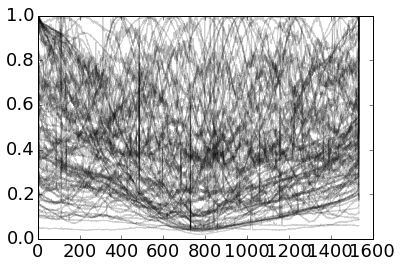

In [312]:
sample = set(random.sample(dd.index,100))
for k,row in dd.iterrows():
    if k in sample:
        plot(row.rms/(row.rms.max()),'k',alpha=0.2)

In [35]:
row.psds.shape

(513, 6)

In [13]:
test_data = df.iloc[27132].wpsds.copy()

In [14]:
import lmfit

In [40]:
def roll_off(x,fc,beta):
    return 1/(1+(x/fc)**beta)
def power_law(x,scale,alpha):
    return scale*(x)**alpha
def full_model(x,red_scale,red_exp,roll_fc,roll_exp,white_noise):
    return power_law(x,red_scale,red_exp)*roll_off(x,roll_fc,roll_exp) + white_noise
def lm_full_model(x,params):
    return full_model(x,params['red_scale'].value,params['red_exp'].value,params['roll_fc'].value,params['roll_exp'].value,
                    params['white_noise'].value)
def lm_full_guess():
    params = lmfit.Parameters()
    params.add('red_exp', value = -2, min = -10, max = 0)
    params.add('red_scale', value = 1e-2, min=1e-6, max=1e6)
    params.add('roll_fc', value =10, min=1e-3,max=1e3)
    params.add('roll_exp', value =2, min=1,max=10)
    params.add('white_noise', value = 1e-9,min=1e-10,max=1e4)
    return params
def lm_full_residual(params,x,y):
    return np.abs(y-lm_full_model(x,params))*np.sqrt(len(y))/y

def lm_powlaw_model(x,params):
    return (power_law(x,params['red_scale'].value,params['red_exp'].value)+
                    params['white_noise'].value)
def lm_powlaw_guess():
    params = lmfit.Parameters()
    params.add('red_exp', value = -2, min = -10, max = 0)
    params.add('red_scale', value = 1e-2, min=1e-6, max=1e6)
    params.add('white_noise', value = 1e-9,min=1e-10,max=1e4)
    return params
def lm_powlaw_residual(params,x,y):
    return np.abs(y-lm_powlaw_model(x,params))*len(y)/y

In [ ]:
init_params = lm_full_guess()
res = lmfit.minimize(lm_full_residual,init_params,args=(wavk[2:-2],test_data[2:-2].mean(1)))#,method='cobyla')
init_params = lm_powlaw_guess()
respl = lmfit.minimize(lm_powlaw_residual,init_params,args=(wavk[2:-2],test_data[2:-2].mean(1)))#,method='cobyla')
print (np.abs(res.residual).sum(),np.abs(respl.residual).sum())

In [55]:
res.nfev

84

In [49]:
res.params.keys()

['red_exp', 'red_scale', 'roll_fc', 'roll_exp', 'white_noise']

In [50]:
p = res.params['red_scale']

In [42]:
lmfit.report_fit(res)
lmfit.report_fit(respl)

[[Fit Statistics]]
    # function evals   = 84
    # data points      = 509
    # variables        = 5
    chi-square         = 689.820
    reduced chi-square = 1.369
[[Variables]]
    red_exp:      -1.19795657 +/- 0.023896 (1.99%) (init=-2)
    red_scale:     0.00011824 +/- 2.44e-06 (2.07%) (init= 0.01)
    roll_fc:       8.81224707 +/- 0.334166 (3.79%) (init= 10)
    roll_exp:      2.06379522 +/- 0.020260 (0.98%) (init= 2)
    white_noise:   8.6610e-08 +/- 3.30e-10 (0.38%) (init= 1e-09)
[[Correlations]] (unreported correlations are <  0.100)
    C(red_exp, roll_fc)          = -0.904 
    C(red_exp, red_scale)        = -0.678 
    C(roll_exp, white_noise)     =  0.473 
    C(red_scale, roll_exp)       = -0.469 
    C(roll_fc, white_noise)      =  0.390 
    C(red_scale, roll_fc)        =  0.337 
    C(roll_fc, roll_exp)         =  0.304 
    C(red_exp, white_noise)      = -0.285 
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 509
    # variables        = 3
   

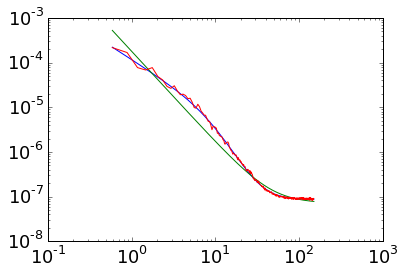

In [36]:
loglog(wavk[2:],lm_full_model(wavk[2:],res.params))
loglog(wavk[2:],lm_powlaw_model(wavk[2:],respl.params))

loglog(wavk[2:-2],test_data[2:-2,:].mean(1))

In [161]:
errorbar?

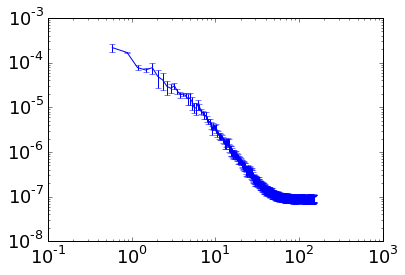

In [48]:
errorbar(wavk[2:],test_data[2:].mean(1),yerr=test_data[2:,3]*0.2)
yscale('log')
xscale('log')

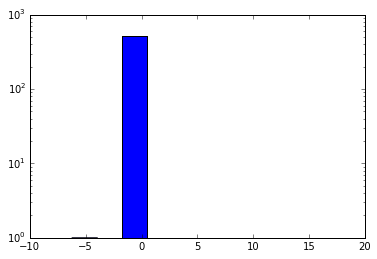

In [159]:
blah = hist((lm_full_model(wavk[1:],res.params)-test_data[1:,3]),bins=10,log=True)

In [ ]:
def full_objective(x,params,y):
    red_knee,red_exp,roll_fc,roll_exp,white_noise = params
    modeled = 